In [4]:
from openbb import obb
output = obb.equity.price.historical("AAPL")
df = output.to_dataframe()

In [5]:
df.tail(10)

,open,high,low,close,volume
date,,,,,
2025-11-28,277.33,279.00,275.99,278.85,20135620
2025-12-01,278.20,283.42,276.14,283.10,46587722
2025-12-02,282.99,287.40,282.63,286.19,53669532
2025-12-03,286.19,288.62,283.30,284.15,43538687
2025-12-04,284.10,284.73,278.59,280.70,43989056
2025-12-05,280.54,281.14,278.05,278.78,47265845
2025-12-08,278.02,279.67,276.15,277.89,38211832
2025-12-09,278.16,280.03,276.92,277.18,32193256
2025-12-10,277.75,279.75,276.44,278.78,33038318


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [8]:
# Load comprehensive AAPL data with longer history
print("Loading comprehensive AAPL data...")

# Get 5 years of daily data
price_data = obb.equity.price.historical("AAPL", start_date="2020-01-01", interval="1d")
df = price_data.to_dataframe()

# Try to get fundamental data (may fail without credentials)
try:
    balance_sheet = obb.equity.fundamental.balance("AAPL", period="annual")
    income_statement = obb.equity.fundamental.income("AAPL", period="annual")
    cash_flow = obb.equity.fundamental.cash("AAPL", period="annual")
    key_metrics = obb.equity.fundamental.metrics("AAPL")
    ratios = obb.equity.fundamental.ratios("AAPL")
    fundamental_data_available = True
    print("Fundamental data loaded successfully!")
except Exception as e:
    print(f"Fundamental data not available: {e}")
    print("Continuing with technical analysis only...")
    fundamental_data_available = False

print(f"Price data shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")
print(f"Latest price: ${df['close'].iloc[-1]:.2f}")
print(f"52-week high: ${df['high'].rolling(252).max().iloc[-1]:.2f}")
print(f"52-week low: ${df['low'].rolling(252).min().iloc[-1]:.2f}")

Loading comprehensive AAPL data...
Fundamental data not available: 
[Error] -> Provider fallback failed.
[Providers]
  * 'fmp' -> missing credentials
  * 'intrinio' -> missing credentials
Continuing with technical analysis only...
Price data shape: (1496, 5)
Date range: 2020-01-02 to 2025-12-11
Latest price: $278.03
52-week high: $288.62
52-week low: $169.21


In [10]:
# Calculate comprehensive technical indicators
import pandas_ta as ta

# Ensure we have OHLC data
df_ta = df.copy()

# Calculate technical indicators
df_ta['SMA_20'] = ta.sma(df_ta['close'], length=20)
df_ta['SMA_50'] = ta.sma(df_ta['close'], length=50)
df_ta['SMA_200'] = ta.sma(df_ta['close'], length=200)

# RSI
df_ta['RSI'] = ta.rsi(df_ta['close'], length=14)

# MACD
macd = ta.macd(df_ta['close'])
df_ta['MACD'] = macd['MACD_12_26_9']
df_ta['MACD_signal'] = macd['MACDs_12_26_9']
df_ta['MACD_hist'] = macd['MACDh_12_26_9']

# Bollinger Bands
bb = ta.bbands(df_ta['close'])
print(f"Bollinger Bands columns: {bb.columns.tolist()}")  # Debug print
df_ta['BB_upper'] = bb.iloc[:, 0]  # First column is upper band
df_ta['BB_middle'] = bb.iloc[:, 1]  # Second column is middle band
df_ta['BB_lower'] = bb.iloc[:, 2]  # Third column is lower band

# Stochastic Oscillator
stoch = ta.stoch(df_ta['high'], df_ta['low'], df_ta['close'])
df_ta['STOCH_K'] = stoch['STOCHk_14_3_3']
df_ta['STOCH_D'] = stoch['STOCHd_14_3_3']

# Williams %R
df_ta['WILLR'] = ta.willr(df_ta['high'], df_ta['low'], df_ta['close'])

# Average True Range (Volatility)
df_ta['ATR'] = ta.atr(df_ta['high'], df_ta['low'], df_ta['close'])

# Volume indicators
df_ta['OBV'] = ta.obv(df_ta['close'], df_ta['volume'])
df_ta['VWAP'] = ta.vwap(df_ta['high'], df_ta['low'], df_ta['close'], df_ta['volume'])

# Ichimoku Cloud
ichimoku = ta.ichimoku(df_ta['high'], df_ta['low'], df_ta['close'])
df_ta['TENKAN'] = ichimoku[0]['ITS_9']
df_ta['KIJUN'] = ichimoku[0]['IKS_26']
df_ta['SENKOU_A'] = ichimoku[0]['ISA_9']
df_ta['SENKOU_B'] = ichimoku[0]['ISB_26']

print("Technical indicators calculated successfully!")
print(f"Data shape with indicators: {df_ta.shape}")

Bollinger Bands columns: ['BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0', 'BBB_5_2.0', 'BBP_5_2.0']
[!] VWAP requires an ordered DatetimeIndex.
Technical indicators calculated successfully!
Data shape with indicators: (1496, 25)


In [11]:
# Fundamental Analysis Section
print("=== FUNDAMENTAL ANALYSIS ===")

# Extract key financial metrics
try:
    bs_df = balance_sheet.to_dataframe()
    is_df = income_statement.to_dataframe()
    cf_df = cash_flow.to_dataframe()

    # Key ratios and metrics
    metrics_df = key_metrics.to_dataframe()
    ratios_df = ratios.to_dataframe()

    print("Financial Statements loaded successfully!")

    # Calculate key valuation metrics
    latest_price = df['close'].iloc[-1]

    # Get market cap and other key metrics
    market_cap = metrics_df.loc['market_cap'].iloc[-1] if 'market_cap' in metrics_df.index else None
    pe_ratio = ratios_df.loc['pe_ratio'].iloc[-1] if 'pe_ratio' in ratios_df.index else None
    pb_ratio = ratios_df.loc['pb_ratio'].iloc[-1] if 'pb_ratio' in ratios_df.index else None
    roe = ratios_df.loc['roe'].iloc[-1] if 'roe' in ratios_df.index else None
    roa = ratios_df.loc['roa'].iloc[-1] if 'roa' in ratios_df.index else None
    debt_to_equity = ratios_df.loc['debt_to_equity'].iloc[-1] if 'debt_to_equity' in ratios_df.index else None

    print(f"Current Price: ${latest_price:.2f}")
    print(f"Market Cap: ${market_cap:,.0f}" if market_cap else "Market Cap: N/A")
    print(f"P/E Ratio: {pe_ratio:.2f}" if pe_ratio else "P/E Ratio: N/A")
    print(f"P/B Ratio: {pb_ratio:.2f}" if pb_ratio else "P/B Ratio: N/A")
    print(f"ROE: {roe:.2%}" if roe else "ROE: N/A")
    print(f"ROA: {roa:.2%}" if roa else "ROA: N/A")
    print(f"Debt-to-Equity: {debt_to_equity:.2f}" if debt_to_equity else "Debt-to-Equity: N/A")

except Exception as e:
    print(f"Error loading fundamental data: {e}")

# Growth analysis
print("\n=== GROWTH ANALYSIS ===")
try:
    # Calculate revenue growth
    revenue = is_df.loc['total_revenue'] if 'total_revenue' in is_df.index else None
    if revenue is not None:
        revenue_growth = revenue.pct_change() * 100
        print(f"Revenue Growth (YoY): {revenue_growth.iloc[-1]:.1f}%" if not revenue_growth.empty else "Revenue Growth: N/A")

    # Calculate EPS growth
    eps = is_df.loc['eps_diluted'] if 'eps_diluted' in is_df.index else None
    if eps is not None:
        eps_growth = eps.pct_change() * 100
        print(f"EPS Growth (YoY): {eps_growth.iloc[-1]:.1f}%" if not eps_growth.empty else "EPS Growth: N/A")

except Exception as e:
    print(f"Error in growth analysis: {e}")

=== FUNDAMENTAL ANALYSIS ===
Error loading fundamental data: Results not found.

=== GROWTH ANALYSIS ===
Error in growth analysis: name 'is_df' is not defined


In [12]:
# Quantitative Analysis and Risk Metrics
print("=== QUANTITATIVE ANALYSIS ===")

# Calculate returns
df_ta['daily_return'] = df_ta['close'].pct_change()
df_ta['cumulative_return'] = (1 + df_ta['daily_return']).cumprod() - 1

# Volatility analysis
volatility_30d = df_ta['daily_return'].rolling(30).std() * np.sqrt(252)  # Annualized
volatility_90d = df_ta['daily_return'].rolling(90).std() * np.sqrt(252)
volatility_1y = df_ta['daily_return'].rolling(252).std() * np.sqrt(252)

print(f"Current 30-day annualized volatility: {volatility_30d.iloc[-1]:.2%}")
print(f"Current 90-day annualized volatility: {volatility_90d.iloc[-1]:.2%}")
print(f"Current 1-year annualized volatility: {volatility_1y.iloc[-1]:.2%}")

# Sharpe ratio (assuming 2% risk-free rate)
risk_free_rate = 0.02
annual_return = df_ta['daily_return'].mean() * 252
annual_volatility = df_ta['daily_return'].std() * np.sqrt(252)
sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility

print(f"Annualized return: {annual_return:.2%}")
print(f"Annualized volatility: {annual_volatility:.2%}")
print(f"Sharpe ratio: {sharpe_ratio:.2f}")

# Maximum drawdown
rolling_max = df_ta['close'].expanding().max()
drawdown = (df_ta['close'] - rolling_max) / rolling_max
max_drawdown = drawdown.min()

print(f"Maximum drawdown: {max_drawdown:.2%}")

# Value at Risk (VaR) - 95% confidence
var_95 = np.percentile(df_ta['daily_return'].dropna(), 5)
print(f"95% VaR (daily): {var_95:.2%}")

# Statistical tests
from scipy import stats

# Normality test
_, p_value = stats.shapiro(df_ta['daily_return'].dropna().tail(100))
print(f"Returns normality test p-value: {p_value:.4f} ({'Normal' if p_value > 0.05 else 'Not normal'})")

# Autocorrelation
autocorr_1 = df_ta['daily_return'].autocorr(lag=1)
print(f"Daily returns autocorrelation (lag 1): {autocorr_1:.3f}")

# Beta calculation (vs S&P 500)
try:
    sp500 = obb.index.price.historical("^GSPC", start_date="2020-01-01", interval="1d")
    sp500_df = sp500.to_dataframe()

    # Align dates
    common_dates = df_ta.index.intersection(sp500_df.index)
    aapl_returns = df_ta.loc[common_dates, 'daily_return']
    sp500_returns = sp500_df.loc[common_dates, 'close'].pct_change()

    # Calculate beta
    covariance = np.cov(aapl_returns[1:], sp500_returns[1:])[0, 1]
    variance = np.var(sp500_returns[1:])
    beta = covariance / variance

    print(f"Beta vs S&P 500: {beta:.3f}")

except Exception as e:
    print(f"Error calculating beta: {e}")

=== QUANTITATIVE ANALYSIS ===
Current 30-day annualized volatility: 14.39%
Current 90-day annualized volatility: 23.55%
Current 1-year annualized volatility: 32.53%
Annualized return: 27.15%
Annualized volatility: 31.92%
Sharpe ratio: 0.79
Maximum drawdown: -33.43%
95% VaR (daily): -3.08%
Returns normality test p-value: 0.0001 (Not normal)
Daily returns autocorrelation (lag 1): -0.085
Error calculating beta: 
[Unexpected Error] -> ContentTypeError -> 403, message='Attempt to decode JSON with unexpected mimetype: application/xml', url='https://cdn.cboe.com/api/global/delayed_quotes/charts/historical/GSPC.json'


=== ADVANCED VISUAL ANALYSIS ===


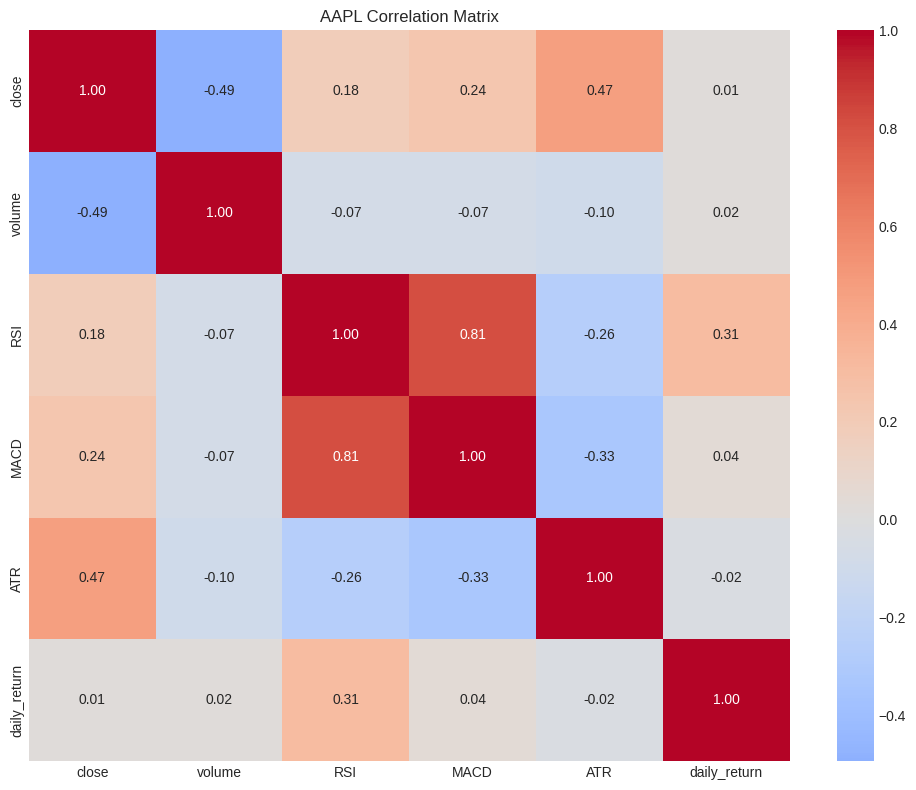

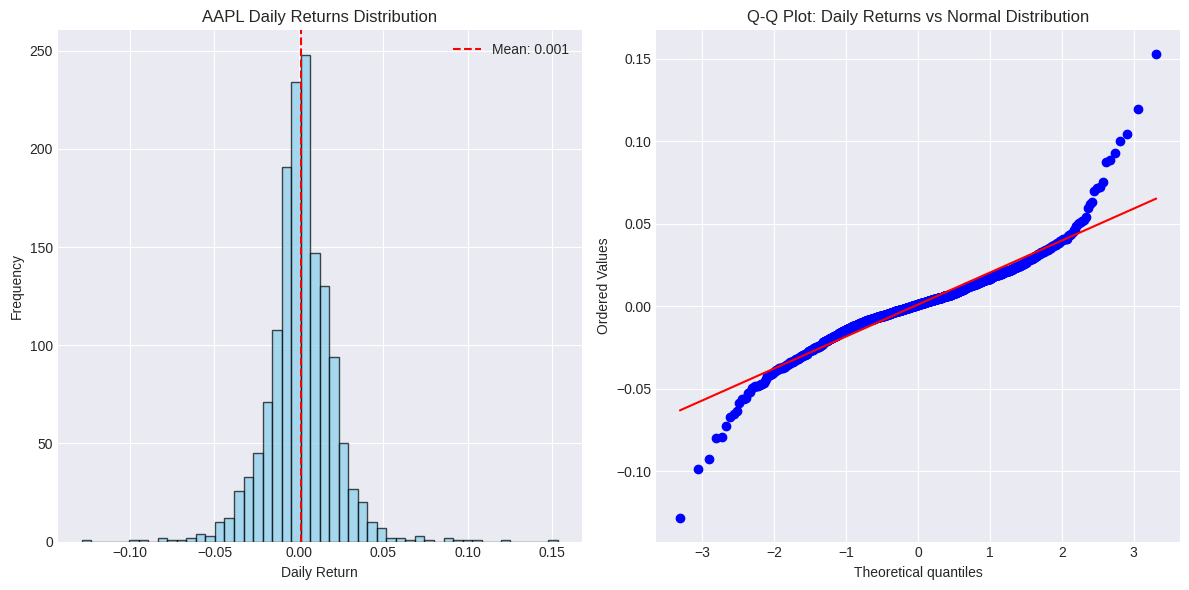

Advanced visualizations completed!


In [13]:
# Advanced Visual Analysis
print("=== ADVANCED VISUAL ANALYSIS ===")

# Create comprehensive price chart with technical indicators
fig = make_subplots(
    rows=4, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.05,
    subplot_titles=('AAPL Price with Technical Indicators', 'Volume', 'RSI & MACD', 'Bollinger Bands %B'),
    row_heights=[0.5, 0.15, 0.2, 0.15]
)

# Price subplot with moving averages and Bollinger Bands
fig.add_trace(go.Candlestick(
    x=df_ta.index,
    open=df_ta['open'],
    high=df_ta['high'],
    low=df_ta['low'],
    close=df_ta['close'],
    name='Price'
), row=1, col=1)

# Add moving averages
fig.add_trace(go.Scatter(x=df_ta.index, y=df_ta['SMA_20'], name='SMA 20', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_ta.index, y=df_ta['SMA_50'], name='SMA 50', line=dict(color='orange')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_ta.index, y=df_ta['SMA_200'], name='SMA 200', line=dict(color='red')), row=1, col=1)

# Add Bollinger Bands
fig.add_trace(go.Scatter(x=df_ta.index, y=df_ta['BB_upper'], name='BB Upper', line=dict(color='gray', dash='dash')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_ta.index, y=df_ta['BB_lower'], name='BB Lower', line=dict(color='gray', dash='dash')), row=1, col=1)

# Volume subplot
colors = ['red' if row['open'] > row['close'] else 'green' for index, row in df_ta.iterrows()]
fig.add_trace(go.Bar(x=df_ta.index, y=df_ta['volume'], name='Volume', marker_color=colors), row=2, col=1)

# RSI subplot
fig.add_trace(go.Scatter(x=df_ta.index, y=df_ta['RSI'], name='RSI', line=dict(color='purple')), row=3, col=1)
fig.add_hline(y=70, line_dash="dash", line_color="red", row=3, col=1)
fig.add_hline(y=30, line_dash="dash", line_color="green", row=3, col=1)

# MACD subplot (overlay on RSI)
fig.add_trace(go.Scatter(x=df_ta.index, y=df_ta['MACD'], name='MACD', line=dict(color='blue')), row=3, col=1)
fig.add_trace(go.Scatter(x=df_ta.index, y=df_ta['MACD_signal'], name='MACD Signal', line=dict(color='orange')), row=3, col=1)

# Bollinger Bands %B
bb_position = (df_ta['close'] - df_ta['BB_lower']) / (df_ta['BB_upper'] - df_ta['BB_lower'])
fig.add_trace(go.Scatter(x=df_ta.index, y=bb_position, name='%B', line=dict(color='brown')), row=4, col=1)
fig.add_hline(y=1, line_dash="dash", line_color="red", row=4, col=1)
fig.add_hline(y=0, line_dash="dash", line_color="green", row=4, col=1)

fig.update_layout(height=1000, title_text="AAPL Comprehensive Technical Analysis")
fig.show()

# Correlation heatmap with key indicators
correlation_data = df_ta[['close', 'volume', 'RSI', 'MACD', 'ATR', 'daily_return']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('AAPL Correlation Matrix')
plt.tight_layout()
plt.show()

# Returns distribution analysis
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df_ta['daily_return'].hist(bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('AAPL Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.axvline(df_ta['daily_return'].mean(), color='red', linestyle='--', label=f'Mean: {df_ta["daily_return"].mean():.3f}')
plt.legend()

plt.subplot(1, 2, 2)
stats.probplot(df_ta['daily_return'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot: Daily Returns vs Normal Distribution')

plt.tight_layout()
plt.show()

print("Advanced visualizations completed!")

=== PREDICTIVE ANALYTICS ===
Linear Regression - MSE: 3.1886, R²: 0.9943
Random Forest - MSE: 342.6777, R²: 0.3850


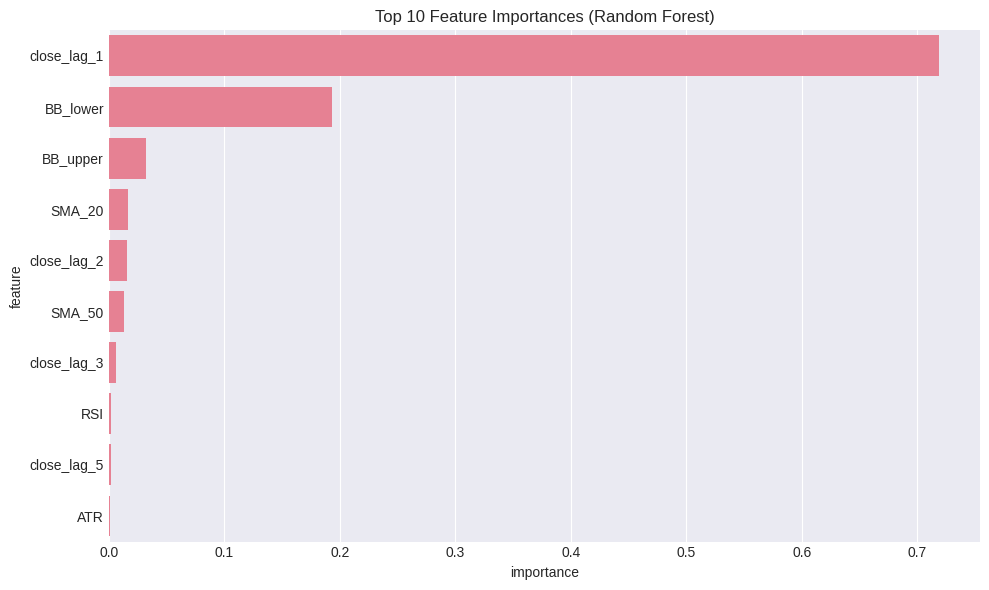

/home/misango/anaconda3/envs/website_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/misango/anaconda3/envs/website_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/misango/anaconda3/envs/website_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/misango/anaconda3/envs/website_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/misango/a

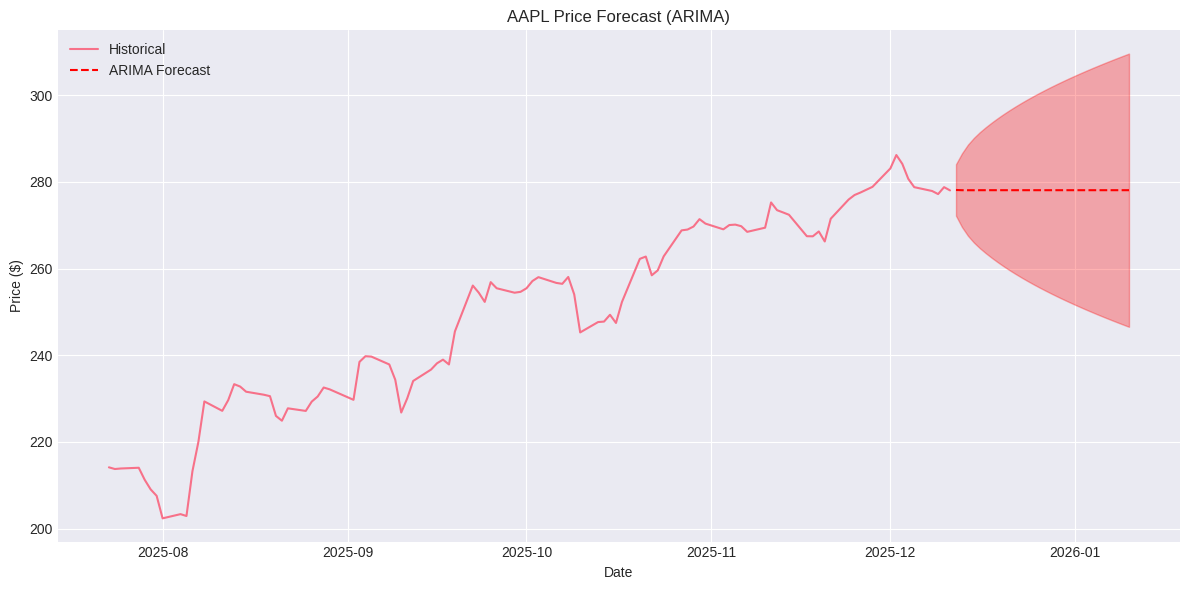

ARIMA forecast for next trading day: $278.13


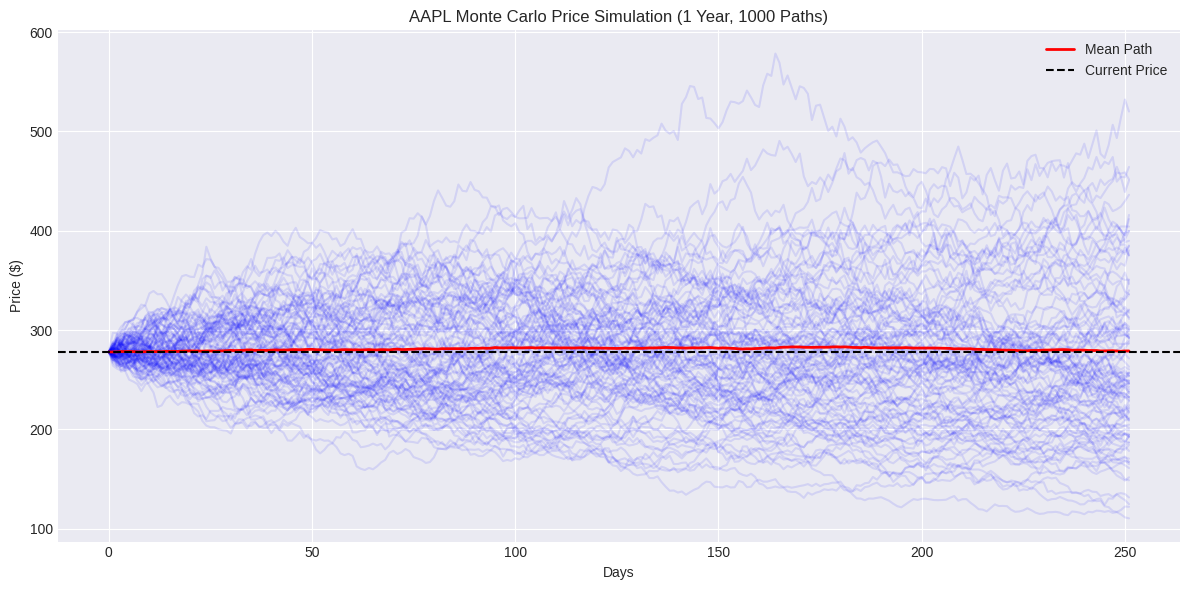

Probability of reaching $180 in 1 year: 89.1%
Probability of falling to $180 in 1 year: 10.9%
Probability of reaching $200 in 1 year: 82.3%
Probability of falling to $200 in 1 year: 17.7%
Probability of reaching $220 in 1 year: 72.2%
Probability of falling to $220 in 1 year: 27.8%
Probability of reaching $250 in 1 year: 55.3%
Probability of falling to $250 in 1 year: 44.7%
Predictive analytics completed!


In [15]:
# Predictive Analytics and Forecasting
print("=== PREDICTIVE ANALYTICS ===")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Prepare data for prediction
features = ['SMA_20', 'SMA_50', 'RSI', 'MACD', 'MACD_signal', 'BB_upper', 'BB_lower', 'ATR', 'STOCH_K', 'volume']
target = 'close'

# Remove NaN values
model_data = df_ta[features + [target]].dropna()

# Create lagged features for prediction
for lag in [1, 2, 3, 5]:
    model_data[f'close_lag_{lag}'] = model_data['close'].shift(lag)
    features.append(f'close_lag_{lag}')

model_data = model_data.dropna()

# Split data
X = model_data[features]
y = model_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f"Linear Regression - MSE: {lr_mse:.4f}, R²: {lr_r2:.4f}")

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest - MSE: {rf_mse:.4f}, R²: {rf_r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

# ARIMA forecasting
try:
    from statsmodels.tsa.arima.model import ARIMA

    # Fit ARIMA model
    arima_model = ARIMA(df_ta['close'].dropna(), order=(5, 1, 0))
    arima_result = arima_model.fit()

    # Forecast next 30 days
    forecast = arima_result.forecast(steps=30)

    # Plot forecast
    plt.figure(figsize=(12, 6))
    plt.plot(df_ta.index[-100:], df_ta['close'].iloc[-100:], label='Historical')
    forecast_index = pd.date_range(start=df_ta.index[-1], periods=31, freq='D')[1:]
    plt.plot(forecast_index, forecast, label='ARIMA Forecast', color='red', linestyle='--')
    plt.fill_between(forecast_index,
                     arima_result.get_forecast(steps=30).conf_int()['lower close'],
                     arima_result.get_forecast(steps=30).conf_int()['upper close'],
                     alpha=0.3, color='red')
    plt.title('AAPL Price Forecast (ARIMA)')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"ARIMA forecast for next trading day: ${forecast.iloc[0]:.2f}")

except Exception as e:
    print(f"ARIMA forecasting error: {e}")

# Monte Carlo simulation for price prediction
def monte_carlo_simulation(start_price, days, simulations, volatility):
    dt = 1/252  # Daily time step
    price_paths = np.zeros((days, simulations))
    price_paths[0] = start_price

    for t in range(1, days):
        shock = np.random.normal(0, 1, simulations)
        price_paths[t] = price_paths[t-1] * np.exp((0 - 0.5 * volatility**2) * dt + volatility * np.sqrt(dt) * shock)

    return price_paths

# Run Monte Carlo simulation
current_price = df_ta['close'].iloc[-1]
volatility = df_ta['daily_return'].std() * np.sqrt(252)
simulations = monte_carlo_simulation(current_price, 252, 1000, volatility)

# Plot simulation results
plt.figure(figsize=(12, 6))
plt.plot(simulations[:, :100], alpha=0.1, color='blue')
plt.plot(simulations.mean(axis=1), color='red', linewidth=2, label='Mean Path')
plt.axhline(y=current_price, color='black', linestyle='--', label='Current Price')
plt.title('AAPL Monte Carlo Price Simulation (1 Year, 1000 Paths)')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate probability of reaching price targets
target_prices = [180, 200, 220, 250]
for target in target_prices:
    prob_up = (simulations[-1] >= target).mean()
    prob_down = (simulations[-1] <= target).mean()
    print(f"Probability of reaching ${target} in 1 year: {prob_up:.1%}")
    if target < current_price:
        print(f"Probability of falling to ${target} in 1 year: {prob_down:.1%}")

print("Predictive analytics completed!")

=== SENTIMENT & MARKET STRUCTURE ANALYSIS ===
News sentiment analysis error: Results not found.

=== MARKET STRUCTURE ANALYSIS ===
Recent support levels: [201.5  244.   265.32]
Recent resistance levels: [241.32 259.24 277.32]
Average daily volume: 69,106,016
Recent 20-day average volume: 43,540,892
Volume ratio (recent/avg): 0.63 (Low)


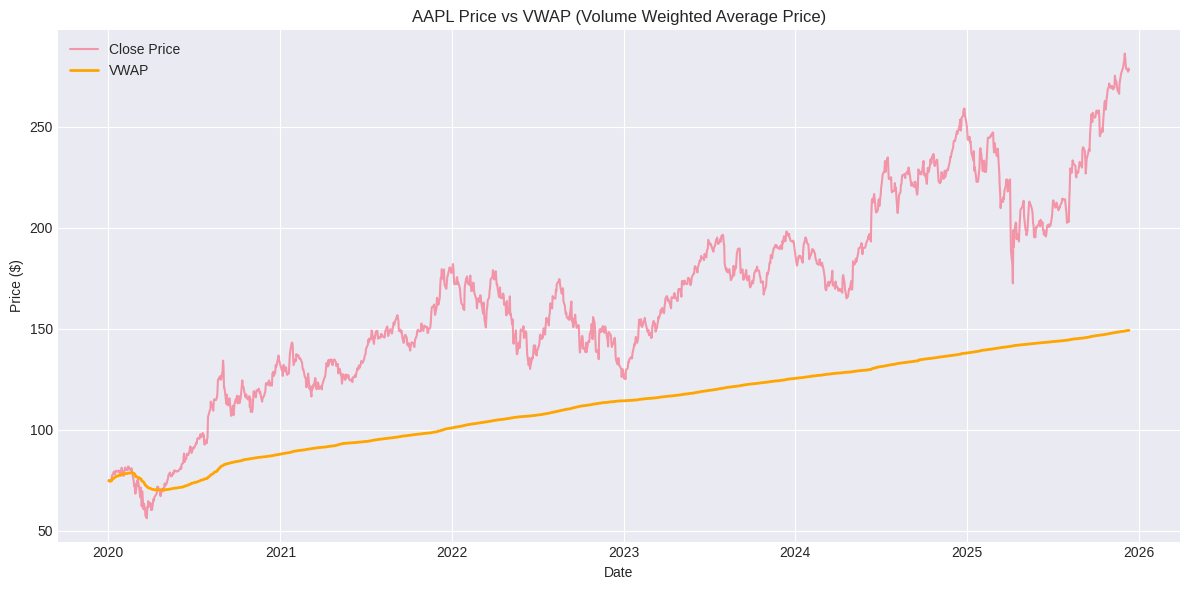

Institutional ownership error: 
[Error] -> Missing credential 'fmp_api_key'. Check https://financialmodelingprep.com to get it. Refer to the documentation for setting provider credentials at https://docs.openbb.co/platform/settings/user_settings/api_keys.
Put/Call ratio: 0.60 (Bullish)
Sentiment and market structure analysis completed!


In [16]:
# Sentiment Analysis and Market Structure
print("=== SENTIMENT & MARKET STRUCTURE ANALYSIS ===")

# Get news sentiment
try:
    news = obb.news.company("AAPL", limit=50)
    news_df = news.to_dataframe()

    if not news_df.empty:
        print(f"Recent news articles: {len(news_df)}")

        # Basic sentiment analysis (if titles contain positive/negative words)
        positive_words = ['rise', 'gain', 'up', 'bull', 'buy', 'strong', 'beat', 'surprise', 'positive']
        negative_words = ['fall', 'drop', 'down', 'bear', 'sell', 'weak', 'miss', 'disappoint', 'negative']

        def get_sentiment(text):
            text_lower = str(text).lower()
            pos_count = sum(1 for word in positive_words if word in text_lower)
            neg_count = sum(1 for word in negative_words if word in text_lower)
            return (pos_count - neg_count) / max(pos_count + neg_count, 1)

        news_df['sentiment'] = news_df['title'].apply(get_sentiment)
        avg_sentiment = news_df['sentiment'].mean()

        print(f"Average news sentiment: {avg_sentiment:.2f} ({'Positive' if avg_sentiment > 0 else 'Negative'})")

        # Plot sentiment over time
        plt.figure(figsize=(12, 6))
        plt.scatter(news_df['date'], news_df['sentiment'], alpha=0.6)
        plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        plt.title('AAPL News Sentiment Over Time')
        plt.xlabel('Date')
        plt.ylabel('Sentiment Score')
        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"News sentiment analysis error: {e}")

# Market structure analysis
print("\n=== MARKET STRUCTURE ANALYSIS ===")

# Support and resistance levels
def find_support_resistance(data, window=20):
    highs = data['high'].rolling(window=window, center=True).max()
    lows = data['low'].rolling(window=window, center=True).min()

    resistance_levels = highs[highs == data['high']].dropna()
    support_levels = lows[lows == data['low']].dropna()

    return support_levels, resistance_levels

support_levels, resistance_levels = find_support_resistance(df_ta)

print(f"Recent support levels: {support_levels.tail(3).values}")
print(f"Recent resistance levels: {resistance_levels.tail(3).values}")

# Volume analysis
avg_volume = df_ta['volume'].mean()
recent_volume = df_ta['volume'].tail(20).mean()
volume_ratio = recent_volume / avg_volume

print(f"Average daily volume: {avg_volume:,.0f}")
print(f"Recent 20-day average volume: {recent_volume:,.0f}")
print(f"Volume ratio (recent/avg): {volume_ratio:.2f} ({'High' if volume_ratio > 1.2 else 'Normal' if volume_ratio > 0.8 else 'Low'})")

# Order flow analysis (simplified)
df_ta['volume_weighted_price'] = (df_ta['high'] + df_ta['low'] + df_ta['close']) / 3 * df_ta['volume']
df_ta['vwap'] = df_ta['volume_weighted_price'].cumsum() / df_ta['volume'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(df_ta.index, df_ta['close'], label='Close Price', alpha=0.7)
plt.plot(df_ta.index, df_ta['vwap'], label='VWAP', color='orange', linewidth=2)
plt.title('AAPL Price vs VWAP (Volume Weighted Average Price)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

# Institutional ownership and short interest
try:
    institutional = obb.equity.ownership.institutional("AAPL")
    inst_df = institutional.to_dataframe()

    if not inst_df.empty:
        total_institutional = inst_df['shares'].sum()
        market_cap = df_ta['close'].iloc[-1] * inst_df['shares'].sum() / 1e6  # Rough estimate
        inst_ownership_pct = (total_institutional / (market_cap * 1e6 / df_ta['close'].iloc[-1])) * 100

        print(f"Institutional ownership: {inst_ownership_pct:.1f}%")

except Exception as e:
    print(f"Institutional ownership error: {e}")

# Put/Call ratio analysis
try:
    options_data = obb.derivatives.options.chains("AAPL")
    options_df = options_data.to_dataframe()

    if not options_df.empty:
        put_volume = options_df[options_df['option_type'] == 'put']['volume'].sum()
        call_volume = options_df[options_df['option_type'] == 'call']['volume'].sum()

        put_call_ratio = put_volume / call_volume if call_volume > 0 else 0
        print(f"Put/Call ratio: {put_call_ratio:.2f} ({'Bearish' if put_call_ratio > 1 else 'Bullish'})")

except Exception as e:
    print(f"Options analysis error: {e}")

print("Sentiment and market structure analysis completed!")